# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [55]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

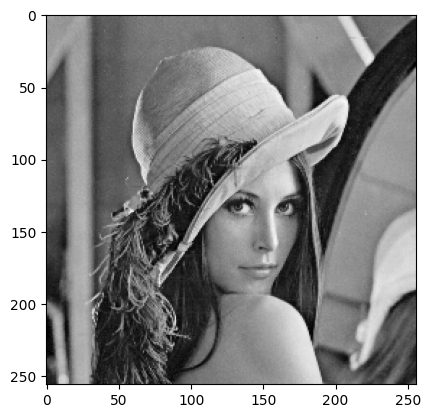

In [60]:
lena = plt.imread('data/lena.png')
plt.imshow(lena, 'grey')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [17]:
# kleiner Test um zu verstehen, was numpy.ndindex() macht
for i in numpy.ndindex(3, 3):
    print(i)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


In [67]:
# size ist ungerade Zahl!
def meanfilter(img, size):
    # Ergebnis ist zunächst schwarzes Bild in Größe des Originalbilds, das gleich überschrieben wird
    result = numpy.zeros(img.shape)
    # n dient zur Navigation bei der Positionierung des Filters und zur Festlegung des Bildrandes
    # n entspricht Anzahl der Pixel-"Schichten", die zentralen Pixel p umgeben (bei 3x3-Filter: 1 Schicht)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            # Prüfen, ob Koordinaten von p an den Rändern liegen, wenn ja --> schwarz
            if p[0]<n or p[0]>img.shape[0]-n-1 or p[1]<n or p[1]>img.shape[0]-n-1:
                neighborhood_sum = 0
            # Festlegen der Koordinaten des Filters mit der Größe size auf Punkt p,
            # sodass p in der Mitte steht
            else:
                x = p[0] - n + q[0]
                y = p[1] - n + q[1]
                neighborhood_sum += img[x,y]
        # Intensität von p ist jetzt entweder schwarz (Rand) oder Durchschnitt der Pixel im Filter
        result[p] = neighborhood_sum / (size*size)
    # write your code here
    return result



**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

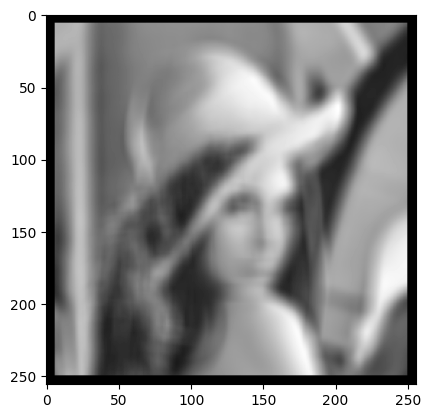

In [35]:
plt.imshow(meanfilter(lena, 13), 'grey')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [40]:
lena5 = meanfilter(lena, 5)
# assert condition: unterbricht Ausführung falls condition false --> AssertionError
# allclose: Vergleich, der numerische Ungenauigkeiten toleriert. False bei unterschiedlichen Bildern
# atol spezifiziert maximal tolerierte Abweichung pro Pixel
# 1/255, da bei png intensitäten als Vielfache von 1/255 quantifiziert werden
assert numpy.allclose(lena, lena5, atol=1/255)

AssertionError: 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [70]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    # write your code here
    n = (size-1) //2
    median = size**2 //2 + 1
    for p in numpy.ndindex(img.shape):
        neighbours = list()
        if p[0]<n or p[0]>img.shape[0]-n-1 or p[1]<n or p[1]>img.shape[1]-n-1:
            result[p] = 0
        else:
            for q in numpy.ndindex(size, size):
                x = p[0] - n + q[0]
                y = p[1] - n + q[1]
                neighbours.append(img[x,y])
            result[p] = sorted(neighbours)[median]      
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

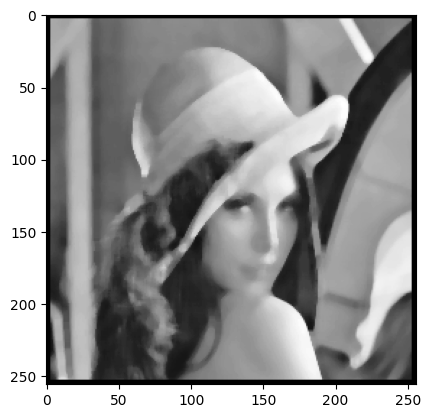

In [101]:
plt.imshow(medianfilter(lena, 7), 'grey')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [72]:
lena52 = medianfilter(lena, 5)
assert numpy.allclose(lena, lena52, atol=1/255)

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [74]:
import scipy.ndimage as sci

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

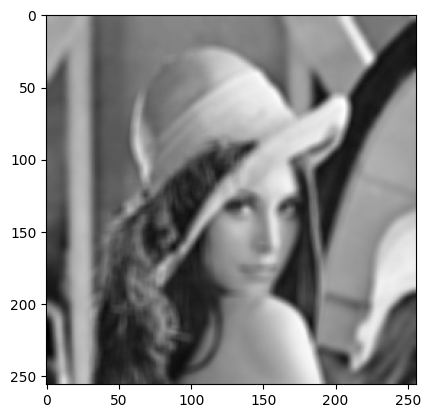

In [81]:
plt.imshow(sci.uniform_filter(lena, 6), 'grey')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

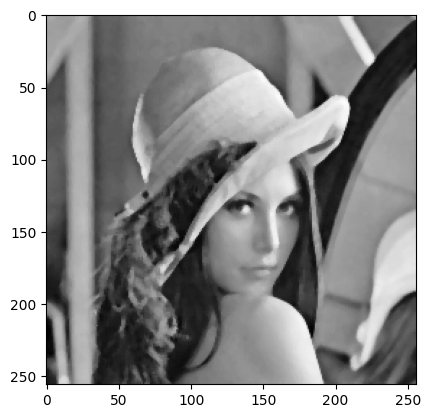

In [80]:
plt.imshow(sci.median_filter(lena, 4), 'grey')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

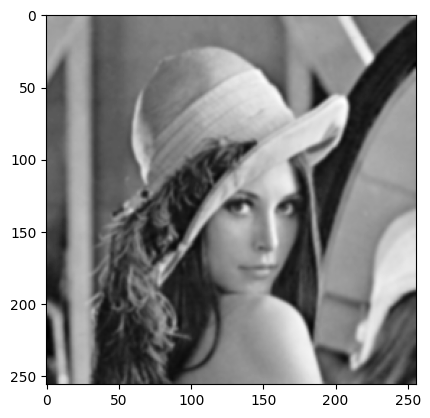

In [82]:
plt.imshow(sci.gaussian_filter(lena, 1), 'grey')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [96]:
lena[19:22, 19:22]

array([[0.5568628 , 0.5411765 , 0.5529412 ],
       [0.5372549 , 0.54901963, 0.5568628 ],
       [0.58431375, 0.5647059 , 0.5294118 ]], dtype=float32)

In [97]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1) //2
    median = size**2 //2 + 1
    for p in numpy.ndindex(img.shape):
        if p[0]<n or p[0]>img.shape[0]-n-1 or p[1]<n or p[1]>img.shape[1]-n-1:
            result[p] = 0
        else:
            x1 = p[0] - n
            y1 = p[1] - n
            x2 = p[0] + n+1
            y2 = p[1] + n+1
            neighbours = img[x1:x2, y1:y2].flatten()
            result[p] = sorted(neighbours)[median]      
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

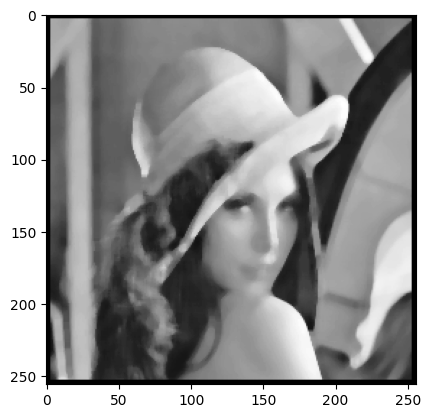

In [102]:
plt.imshow(fastfilter(lena, 7), 'grey')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

920 ms ± 50.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.31 s ± 173 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [105]:
%timeit fastfilter(lena, 9)
%timeit medianfilter(lena, 9)

897 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.17 s ± 48.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: